##**Importing Libraries**##

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from scipy.optimize import minimize
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

##**Loading Dataset**##

In [58]:
investor_data = pd.read_csv("/content/financial_risk_assessment.csv")
investor_data.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


##**EDA**##

In [59]:
returns_data = pd.read_csv("/content/histretSP.csv")
returns_data.head()

,Unnamed: 0,Annual Returns on Investments in,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Value of $100 invested at start of 1928 in,Unnamed: 9,...,Unnamed: 27,Value of $100 invested at start of 1928 in real terms,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Real Risk Premium,Unnamed: 36
0,Year,S&P 500 (includes dividends),US Small cap (bottom decile),3-month T.Bill,US T. Bond (10-year),Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,US Small cap (bottom decile) Cum Value,...,Gold,S&P 500 (includes dividends)3,US Small cap (bottom decile)22,3-month T.Bill4,US T. Bond5,Baa Corporate Bond2,Real Estate2,Gold2,Stocks minus T. Bills,Stocks minus T.Bonds
1,1928,43.81%,59.91%,3.08%,0.84%,3.22%,1.49%,0.10%,$143.81,$159.91,...,1.27%,$145.49,$161.78,$104.29,$102.01,$104.43,$102.68,$101.27,41.21%,43.48%
2,1929,-8.30%,-46.61%,3.16%,4.20%,3.02%,-2.06%,-0.15%,$131.88,$85.38,...,-0.73%,$132.64,$85.87,$106.96,$105.69,$106.95,$99.98,$100.53,-11.39%,-12.43%
3,1930,-25.12%,-50.03%,4.55%,4.54%,0.54%,-4.30%,0.10%,$98.75,$42.66,...,6.94%,$106.11,$45.84,$119.46,$118.03,$114.88,$102.22,$107.51,-31.70%,-31.69%
4,1931,-43.84%,-44.66%,2.31%,-2.56%,-15.68%,-8.15%,-17.38%,$55.46,$23.61,...,-8.90%,$65.71,$27.98,$134.78,$126.83,$106.82,$103.53,$97.94,-50.89%,-45.52%


In [60]:
print("Dataset Info:")
investor_data.info()
print("\nSummary Statistics:")
investor_data.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  o

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


##**Removing Null Values**##

In [61]:
investor_data.dropna(inplace=True)

In [62]:
# Encode categorical variables
categorical_cols = investor_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    investor_data[col] = LabelEncoder().fit_transform(investor_data[col])

In [63]:
# Standardize features
scaler = StandardScaler()
X_features = investor_data.drop(columns=["Risk Rating"])
X_scaled = scaler.fit_transform(X_features)

##**Checking Class Imbalance**##

In [64]:
print("Risk Rating Class Distribution Before SMOTE:")
print(pd.Series(y_risk).value_counts())

Risk Rating Class Distribution Before SMOTE:
1    3424
2    1729
0     563
Name: count, dtype: int64


In [65]:
# Encode risk rating for classification
y_risk = investor_data["Risk Rating"]
label_encoder = LabelEncoder()
y_risk = label_encoder.fit_transform(y_risk)

##**Handling class imbalance using SMOTE**##

In [66]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_risk)

In [67]:
print("Risk Rating Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_risk)

Risk Rating Class Distribution After SMOTE:
1    3424
2    3424
0    3424
Name: count, dtype: int64


##**Spliting the Dataset**##

In [68]:
# Splitting data
X_risk_train, X_risk_test, y_risk_train, y_risk_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

##**Model Training and Evaluation**##

In [69]:
# Initialize and train classification models to predict risk rating
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

best_model = None
best_accuracy = 0
model_results = {}

for name, model in models.items():
    model.fit(X_risk_train, y_risk_train)
    y_pred = model.predict(X_risk_test)
    accuracy = accuracy_score(y_risk_test, y_pred)
    precision = precision_score(y_risk_test, y_pred, average='weighted')
    recall = recall_score(y_risk_test, y_pred, average='weighted')
    f1 = f1_score(y_risk_test, y_pred, average='weighted')

    model_results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Performing Model: {best_model}")

Logistic Regression - Accuracy: 0.3791, Precision: 0.3770, Recall: 0.3791, F1 Score: 0.3774
Random Forest - Accuracy: 0.7669, Precision: 0.7846, Recall: 0.7669, F1 Score: 0.7626
Extra Trees - Accuracy: 0.8628, Precision: 0.8752, Recall: 0.8628, F1 Score: 0.8624
AdaBoost - Accuracy: 0.5022, Precision: 0.5329, Recall: 0.5022, F1 Score: 0.5031
Support Vector Machine - Accuracy: 0.6856, Precision: 0.6823, Recall: 0.6856, F1 Score: 0.6835
Naive Bayes - Accuracy: 0.4394, Precision: 0.4355, Recall: 0.4394, F1 Score: 0.4367
K-Nearest Neighbors - Accuracy: 0.6545, Precision: 0.6619, Recall: 0.6545, F1 Score: 0.6197

Best Performing Model: ExtraTreesClassifier(random_state=42)



=== Logistic Regression ===
Accuracy: 0.3791
Precision: 0.3770
Recall: 0.3791
F1 Score: 0.3774


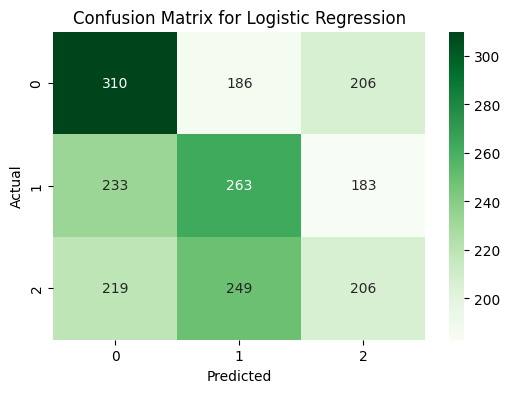


Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.44      0.42       702
           1       0.38      0.39      0.38       679
           2       0.35      0.31      0.32       674

    accuracy                           0.38      2055
   macro avg       0.38      0.38      0.38      2055
weighted avg       0.38      0.38      0.38      2055


=== Random Forest ===
Accuracy: 0.7669
Precision: 0.7846
Recall: 0.7669
F1 Score: 0.7626


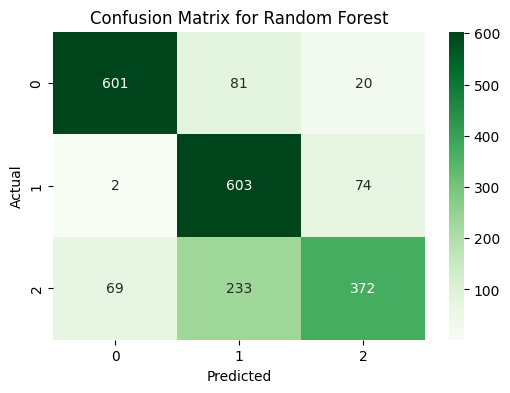


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       702
           1       0.66      0.89      0.76       679
           2       0.80      0.55      0.65       674

    accuracy                           0.77      2055
   macro avg       0.78      0.77      0.76      2055
weighted avg       0.78      0.77      0.76      2055


=== Extra Trees ===
Accuracy: 0.8628
Precision: 0.8752
Recall: 0.8628
F1 Score: 0.8624


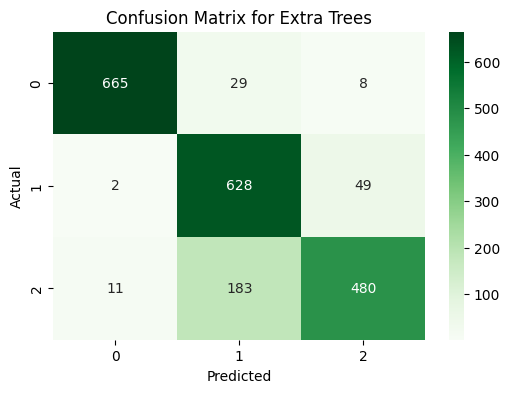


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       702
           1       0.75      0.92      0.83       679
           2       0.89      0.71      0.79       674

    accuracy                           0.86      2055
   macro avg       0.87      0.86      0.86      2055
weighted avg       0.88      0.86      0.86      2055


=== AdaBoost ===
Accuracy: 0.5022
Precision: 0.5329
Recall: 0.5022
F1 Score: 0.5031


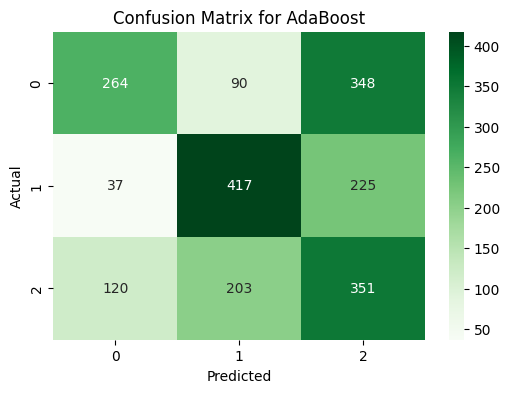


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.38      0.47       702
           1       0.59      0.61      0.60       679
           2       0.38      0.52      0.44       674

    accuracy                           0.50      2055
   macro avg       0.53      0.50      0.50      2055
weighted avg       0.53      0.50      0.50      2055


=== Support Vector Machine ===
Accuracy: 0.6856
Precision: 0.6823
Recall: 0.6856
F1 Score: 0.6835


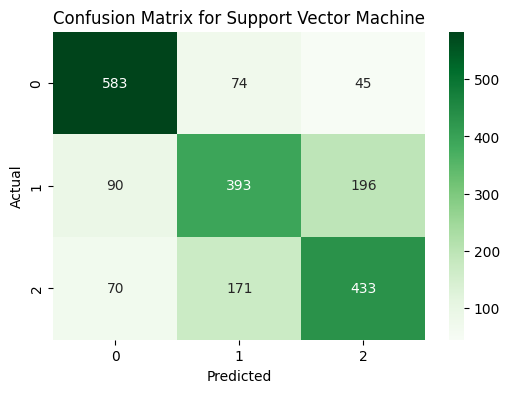


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       702
           1       0.62      0.58      0.60       679
           2       0.64      0.64      0.64       674

    accuracy                           0.69      2055
   macro avg       0.68      0.68      0.68      2055
weighted avg       0.68      0.69      0.68      2055


=== Naive Bayes ===
Accuracy: 0.4394
Precision: 0.4355
Recall: 0.4394
F1 Score: 0.4367


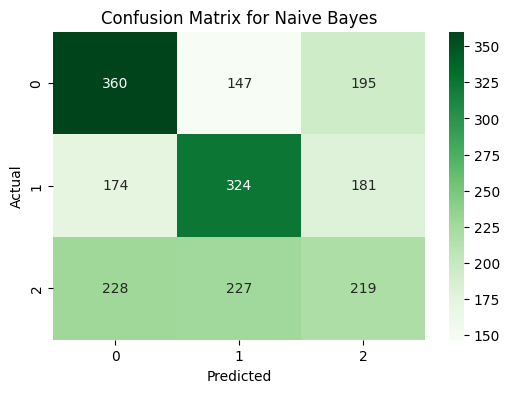


Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       702
           1       0.46      0.48      0.47       679
           2       0.37      0.32      0.35       674

    accuracy                           0.44      2055
   macro avg       0.43      0.44      0.44      2055
weighted avg       0.44      0.44      0.44      2055


=== K-Nearest Neighbors ===
Accuracy: 0.6545
Precision: 0.6619
Recall: 0.6545
F1 Score: 0.6197


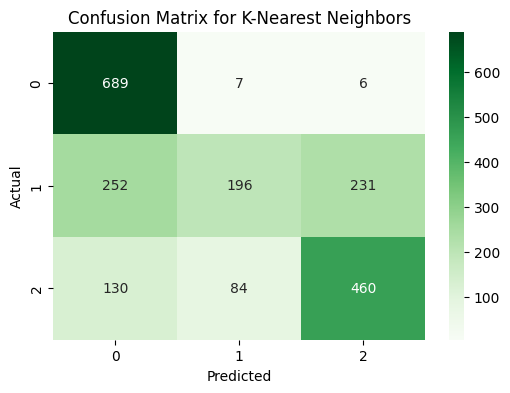


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       702
           1       0.68      0.29      0.41       679
           2       0.66      0.68      0.67       674

    accuracy                           0.65      2055
   macro avg       0.66      0.65      0.62      2055
weighted avg       0.66      0.65      0.62      2055


Best Performing Model based on F1 Score: ExtraTreesClassifier(random_state=42)


In [70]:
# Initialize and train classification models to predict risk rating
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

best_model = None
best_f1 = 0
model_results = {}

for name, model in models.items():
    model.fit(X_risk_train, y_risk_train)
    y_pred = model.predict(X_risk_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_risk_test, y_pred)
    precision = precision_score(y_risk_test, y_pred, average='weighted')
    recall = recall_score(y_risk_test, y_pred, average='weighted')
    f1 = f1_score(y_risk_test, y_pred, average='weighted')

    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_risk_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Confusion Matrix for {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_risk_test, y_pred))

    model_results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

    if f1 > best_f1:
        best_f1 = f1
        best_model = model

print(f"\nBest Performing Model based on F1 Score: {best_model}")

##**Loading Historical Asset Returns and Converting % into float**##

In [71]:
# Load historical asset returns
try:
    returns_data = returns_data.iloc[:, :6]  # Select first six columns safely
    returns_data.columns = ["Year", "Stocks", "Treasury Bills", "Treasury Bonds", "Real Estate", "Gold"]
    returns_data = returns_data.dropna()

    # Remove '%' and convert to float
    for col in returns_data.columns[1:]:
        returns_data[col] = returns_data[col].astype(str).str.replace('%', '', regex=False).astype(float)
except Exception as e:
    print(f"Error loading returns data: {e}")

Error loading returns data: could not convert string to float: 'S&P 500 (includes dividends)'


##**Using Modern Portfolio Theory**##

In [72]:
# Compute MPT metrics
try:
    expected_returns = returns_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').mean()
    cov_matrix = returns_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').cov()
except Exception as e:
    print(f"Error computing MPT metrics: {e}")

In [73]:
# MPT Optimization function
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def optimize_portfolio(risk_tolerance):
    num_assets = len(expected_returns)
    initial_weights = np.ones(num_assets) / num_assets
    bounds = [(0, 1) for _ in range(num_assets)]
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    optimized_result = minimize(portfolio_variance, initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    return optimized_result.x * 100  # Convert to percentages

##**Recommending Personal Portfolio**##

In [74]:
# Function to take user input, predict risk rating, and recommend investment allocation
def predict_investment():
    print("Enter the following details:")
    user_input = []
    for feature in X_features.columns:
        value = input(f"{feature}: ")
        try:
            value = float(value)
        except ValueError:
            value = LabelEncoder().fit_transform([value])[0]  # Encode if not numeric
        user_input.append(value)

    # Create input array and standardize
    user_input = np.array([user_input])
    user_input_scaled = scaler.transform(user_input)

    # Predict risk rating using the best-performing model
    risk_prediction = best_model.predict(user_input_scaled)
    risk_mapping = {0: "Low", 1: "Medium", 2: "High"}
    predicted_risk = risk_mapping.get(risk_prediction[0], "Unknown")
    print(f"Predicted Risk Rating: {predicted_risk}")

    # Optimize portfolio based on predicted risk rating
    optimized_allocation = optimize_portfolio(risk_prediction[0])

    # Display the recommended portfolio allocation
    print("\nRecommended Investment Allocation:")
    print(f"Stocks: {optimized_allocation[0]:.2f}%")
    print(f"Bonds: {optimized_allocation[1]:.2f}%")
    print(f"Treasury Bonds: {optimized_allocation[2]:.2f}%")
    print(f"Real Estate: {optimized_allocation[3]:.2f}%")
    print(f"Gold: {optimized_allocation[4]:.2f}%")

# Call the function for user input and prediction
predict_investment()

Enter the following details:
Age: 49
Gender: Male
Education Level: PhD
Marital Status: Divorced
Income: 72799
Credit Score: 688
Loan Amount: 45713
Loan Purpose: Business
Employment Status: Unemployed
Years at Current Job: 6
Payment History: Poor
Debt-to-Income Ratio: 0.1543132963127
Assets Value: 120228
Number of Dependents: 0
City: Port Elizabeth
State: AS
Country: Cyprus
Previous Defaults: 2
Marital Status Change: 2
Predicted Risk Rating: Medium

Recommended Investment Allocation:
Stocks: 20.00%
Bonds: 20.00%
Treasury Bonds: 20.00%
Real Estate: 20.00%
Gold: 20.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
